In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

/home/goji/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [240]:
def extract_positions_from_log(file_path, field):
    positions = []

    # Regex to match the [POS] line and extract x, y, z as floats
    pattern = re.compile(rf"\[{field}\]\[([-\d.eE]+)d,([-\d.eE]+)d,([-\d.eE]+)d\]")

    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            match = pattern.search(line)
            if match:
                x, y, z = map(float, match.groups())
                positions.append((x, y, z))
    return np.array(positions)

In [241]:
positions = extract_positions_from_log("../data/movements/walk_air.log", "xyz")
velocities = extract_positions_from_log("../data/movements/walk_air.log", "vel")

y = positions[:, 1]

diffs = np.diff(positions, axis=0)

vy = diffs[:, 1]
vh = np.linalg.norm(diffs[:, [0, 2]], axis=1)

vvy = velocities[:, 1]
vvh = np.linalg.norm(velocities[:, [0, 2]], axis=1)

print(vvy)

print(np.mean(vh), np.mean(vvh))

[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.0784     -0.155232   -0.23052737
 -0.30431683 -0.3766305  -0.4474979  -0.51694795 -0.585009   -0.65170883
 -0.71707467 -0.78113319 -0.84391055 -0.90543235 -0.96572372 -1.02480927
 -1.08271311 -1.13945887 -1.19506971 -1.24956834 -1.302977   -1.35531749
 -1.40661116 -1.45687897 -1.50614142 -1.55441862 -1.60173028 -1.64809571
 -1.69353382 -1.73806318 -1.78170195 -1.82446795 -1.86637863 -1.90745109
 -1.94770211 -1.9871481  -2.02580518 -2.06368912 -2.10081538 -2.13719911
 -2.17285517 -2.20779811 -2.24204219 -2.27560139 -2.30848941 -2.34071967
 -2.37230532 -2.40325926 -2.43359412 -2.46332229 -2.49245589 -2.52100682
 -2.54898673 -2.57640705 -2.60327896 -2.62961343 -2.65542121 -2.68071284
 -2.70549864 -2.72978872 -2.753593   -2.77692119 -2.79978282 -2.82218722
 -2.84414353 -2.86566072 -2.88674756 -2.90741266 -2.92766447 -2.947

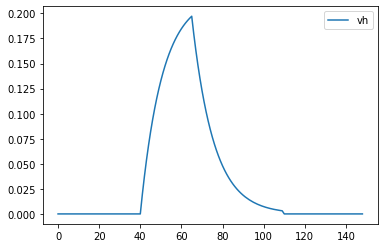

In [242]:
plt.plot(np.arange(len(vh)), vh, label="vh")
plt.legend()

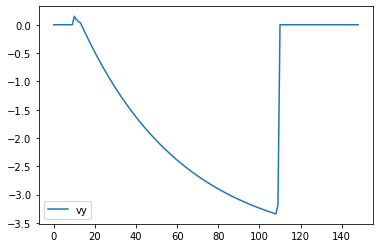

In [243]:
plt.plot(np.arange(len(vy)), vy, label="vy")
plt.legend()

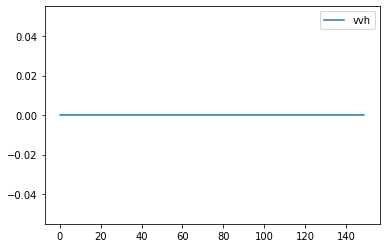

In [244]:
plt.plot(np.arange(len(vvh)), vvh, label="vvh")
plt.legend()

-1.4109152413946393


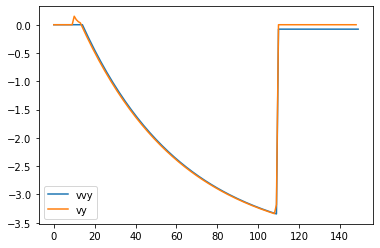

In [245]:
plt.plot(np.arange(len(vvy)), vvy, label="vvy")
plt.plot(np.arange(len(vy)), vy, label="vy")

plt.legend()
print(np.mean(vvy))

In [249]:
# simulate sprint jumping 


g_ground = 0.0784
g_up = 0.0828
g_down = 0.075

jump_strength = 0.415 + g_up

sprint_speed = 0.28

base_jump_boost = 0.24
jump_boost_rel = 0.32
air_fric_rel = 0.14
jump_boost = 0.2
air_fric = 0.3
air_fric_ground = 1.5
air_fric_ground_rel = 5

walk_accel = 0.0971
walk_air_accel = 0.0197
sprint_air_accel = walk_air_accel * 1.3



sim_y = y[0] + 60
sim_vy = vvy[0]
sim_vx = vh[0]
sim_vvx = vvh[0]

ys = [sim_y]
vys = [sim_vy]
vxs = [sim_vx]
vvxs = [sim_vvx]

for t in range(1, len(vh)):
    
    if y[t] + 60 > 0:
        sim_vx -= air_fric_rel * (np.abs(sim_vx)) * 0.088
        sim_vvx -= air_fric * (np.abs(sim_vvx)) * 0.3
    else:
        sim_vx -= air_fric_ground_rel * (np.abs(sim_vx)) * 0.088
        sim_vvx -= air_fric_ground * (np.abs(sim_vvx)) * 0.3
    
    
    if vh[t-1] < vh[t]:
        if vy[t] == 0:
            sim_vvx += walk_accel
        else:
            sim_vvx += walk_air_accel

    if sim_vy > 0:
        g = g_up
    else:
        g = g_down
        
        
    sim_vy -= g
    
    sim_y = np.maximum(sim_y + sim_vy, 0)
    
    
    if sim_y == 0 and vvy[t] < 0.4:
        sim_vy = -g_down
        
    

    
    ys.append(sim_y)
    vys.append(sim_vy)
    
    vxs.append(sim_vx)
    vvxs.append(sim_vvx)
    

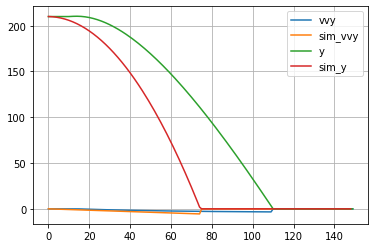

In [250]:
plt.plot(np.arange(len(vvy)), vvy, label="vvy")
plt.plot(np.arange(len(vys)), vys, label="sim_vvy")
plt.plot(np.arange(len(y)), y+60, label="y")
plt.plot(np.arange(len(ys)), ys, label="sim_y")
#plt.hlines(-g_ground, 0, 37)
plt.grid()

plt.legend()


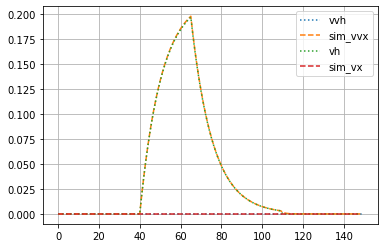

In [251]:
plt.plot(np.arange(len(vvh)), vvh, label="vvh", linestyle=":")
plt.plot(np.arange(len(vvxs)), vvxs, label="sim_vvx", linestyle="--")
plt.plot(np.arange(len(vh)), vh, label="vh", linestyle=":")
plt.plot(np.arange(len(vxs)), vxs, label="sim_vx", linestyle="--")

plt.grid()

plt.legend()